-0.011840905393622037
0.08864409021099753
0.7354731165972888
0.8555329553096489
0.9669921802919902
0.8303172071146379
0.24578254938684319
0.36484005868659086
0.2348112765396
0.17296014648952351
0.26520404818781984
0.3507395213926633
0.06243324301577357
-0.0038637831739252925
0.11901027434520439
0.18515361600517505
-0.7383722867220204
0.2739279265985078
0.43715213543510234
-0.5807406828313244
0.8016231187387208
-0.9609918021233191
0.6321539867271049
-0.13875798939840278
0.04170957830983023
0.07798860916767078
-0.012598531132457976
-0.3250637485020301
0.059425846016935964


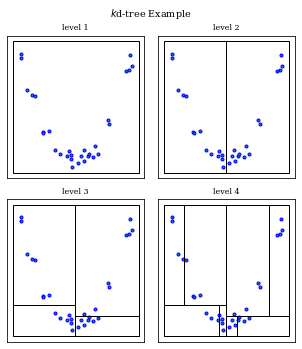

In [3]:
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)


# We'll create a KDTree class which will recursively subdivide the
# space into rectangular regions.  Note that this is just an example
# and shouldn't be used for real computation; instead use the optimized
# code in scipy.spatial.cKDTree or sklearn.neighbors.BallTree
class KDTree:
    """Simple KD tree class"""

    # class initialization function
    def __init__(self, data, mins, maxs):
        self.data = np.asarray(data)

        # data should be two-dimensional
        assert self.data.shape[1] == 2

        if mins is None:
            mins = data.min(0)
        if maxs is None:
            maxs = data.max(0)

        self.mins = np.asarray(mins)
        self.maxs = np.asarray(maxs)
        self.sizes = self.maxs - self.mins

        self.child1 = None
        self.child2 = None

        if len(data) > 1:
            # sort on the dimension with the largest spread
            largest_dim = np.argmax(self.sizes)
            i_sort = np.argsort(self.data[:, largest_dim])
            self.data[:] = self.data[i_sort, :]

            # find split point
            N = self.data.shape[0]
            half_N = int(N / 2)
            split_point = 0.5 * (self.data[half_N, largest_dim]
                                 + self.data[half_N - 1, largest_dim])
            print(split_point)
            # create subnodes
            mins1 = self.mins.copy()
            mins1[largest_dim] = split_point
            maxs2 = self.maxs.copy()
            maxs2[largest_dim] = split_point

            # Recursively build a KD-tree on each sub-node
            self.child1 = KDTree(self.data[half_N:], mins1, self.maxs)
            self.child2 = KDTree(self.data[:half_N], self.mins, maxs2)

    def draw_rectangle(self, ax, depth=None):
        """Recursively plot a visualization of the KD tree region"""
        if depth == 0:
            rect = plt.Rectangle(self.mins, *self.sizes, ec='k', fc='none')
            ax.add_patch(rect)

        if self.child1 is not None:
            if depth is None:
                self.child1.draw_rectangle(ax)
                self.child2.draw_rectangle(ax)
            elif depth > 0:
                self.child1.draw_rectangle(ax, depth - 1)
                self.child2.draw_rectangle(ax, depth - 1)


#------------------------------------------------------------
# Create a set of structured random points in two dimensions
np.random.seed(0)

X = np.random.random((30, 2)) * 2 - 1
X[:, 1] *= 0.1
X[:, 1] += X[:, 0] ** 2

#------------------------------------------------------------
# Use our KD Tree class to recursively divide the space
KDT = KDTree(X, [-1.1, -0.1], [1.1, 1.1])

#------------------------------------------------------------
# Plot four different levels of the KD tree
fig = plt.figure(figsize=(5, 5))
fig.subplots_adjust(wspace=0.1, hspace=0.15,
                    left=0.1, right=0.9,
                    bottom=0.05, top=0.9)

for level in range(1, 5):
    ax = fig.add_subplot(2, 2, level, xticks=[], yticks=[])
    ax.scatter(X[:, 0], X[:, 1], s=9)
    KDT.draw_rectangle(ax, depth=level - 1)

    ax.set_xlim(-1.2, 1.2)
    ax.set_ylim(-0.15, 1.15)
    ax.set_title('level %i' % level)

# suptitle() adds a title to the entire figure
fig.suptitle('$k$d-tree Example')
plt.show()